In [93]:
import numpy as np
import pandas as pd

# 全ての行を表示
pd.set_option('display.max_rows', None)
# 全ての列を表示
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [94]:
wup_path = '/mnt/c/Users/tsimk/Downloads/research/H08/additional_data/WUP/WUP2018/WUP2018-F12-Cities_Over_300k.xls'
unsd_path = '/mnt/c/Users/tsimk/Downloads/research/H08/additional_data/WUP/UNSD-Methodology.csv'

In [95]:
!pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [96]:
df_wup = pd.read_excel(wup_path, skiprows=17, header=None)
new_columns_wup = ['index', 'country_code', 'area', 'city_code', 'name', 'note', 'lat', 'lon', '1950', '1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020', '2025', '2030', '2035']
df_wup.columns = new_columns_wup
df_wup.head()

,index,country_code,area,city_code,name,note,lat,lon,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035
0,1,4,Afghanistan,20001,Herat,NaN,34.348170,62.19967,82.468,85.751,89.166,92.715,101.576,120.323,143.859,162.457,183.465,207.190,233.991,275.678,358.691,466.703,605.575,752.910,897.041,1057.573
1,2,4,Afghanistan,20002,Kabul,NaN,34.528887,69.17246,170.784,220.749,285.352,368.809,471.891,674.254,977.824,1239.961,1549.320,1928.694,2401.109,2905.178,3289.005,3723.543,4221.532,4877.024,5737.138,6760.500
2,3,4,Afghanistan,20003,Kandahar,NaN,31.613320,65.71013,82.199,89.785,98.074,107.123,127.164,154.012,182.904,206.542,233.243,263.395,297.456,336.746,383.498,436.741,498.002,577.128,679.278,800.461
3,4,4,Afghanistan,20004,Mazar-e Sharif,NaN,36.709040,67.11087,30.000,37.139,45.979,56.916,70.460,87.226,105.977,119.677,135.153,152.629,172.372,206.403,283.532,389.483,532.689,681.531,816.040,962.262
4,5,8,Albania,20005,Tiranë (Tirana),NaN,41.327500,19.81889,84.513,106.932,134.761,145.255,156.734,173.975,193.644,217.882,247.270,287.950,335.336,371.803,408.697,449.298,493.712,535.702,565.301,581.626


In [97]:
df_unsd = pd.read_csv(unsd_path, header=0, sep=";")  # Example with semicolon delimiter
print(df_unsd.columns)
df_unsd.head()

Index(['Global Code', 'Global Name', 'Region Code', 'Region Name',
       'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code',
       'Intermediate Region Name', 'Country or Area', 'M49 Code',
       'ISO-alpha2 Code', 'ISO-alpha3 Code', 'Least Developed Countries (LDC)',
       'Land Locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)'],
      dtype='object')


,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [98]:
df_merged = pd.merge(
    df_wup[['country_code', 'area', 'city_code', 'name', '2010']],  # 必要なカラムだけ選択
    df_unsd[['M49 Code', 'Region Code', 'Region Name', 'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code', 'Intermediate Region Name']],  # 必要なカラムだけ選択
    left_on='country_code', right_on='M49 Code',
    how='inner'
)
print(len(df_wup))
print(len(df_merged))
df_merged.head()

1860
1852


,country_code,area,city_code,name,2010,M49 Code,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,4,Afghanistan,20001,Herat,358.691,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
1,4,Afghanistan,20002,Kabul,3289.005,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
2,4,Afghanistan,20003,Kandahar,383.498,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
3,4,Afghanistan,20004,Mazar-e Sharif,283.532,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
4,8,Albania,20005,Tiranë (Tirana),408.697,8,150.0,Europe,39.0,Southern Europe,NaN,NaN


In [99]:
# Taiwanのcountry_codeはUNSDに存在しない(中国は156, 香港は344, マカオは446)
# Taiwanは17,22regionのどちらでもEastern Asiaに属する
df_unmatched = df_wup.loc[~df_wup['country_code'].isin(df_merged['country_code'])]
df_unmatched.head(10)

,index,country_code,area,city_code,name,note,lat,lon,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035
611,612,158,"China, Taiwan Province of China",895000150,Gaoxiong,NaN,22.625962,120.315460,286.893,348.374,423.053,513.685,623.767,757.440,919.808,1116.862,1356.204,1430.923,1488.415,1503.541,1514.337,1525.211,1537.640,1565.859,1601.517,1627.224
612,613,158,"China, Taiwan Province of China",895000379,Jilong,NaN,25.130874,121.736127,174.172,189.967,207.200,225.985,246.478,268.831,293.217,319.801,348.803,367.468,385.778,383.480,379.096,373.728,368.947,371.454,379.162,385.218
613,614,158,"China, Taiwan Province of China",895000149,Taibei,NaN,25.047009,121.545680,550.908,696.347,880.240,1112.552,1406.266,1777.521,2246.932,2497.433,2737.271,2703.631,2642.361,2636.404,2653.861,2685.628,2721.485,2779.198,2843.865,2889.567
614,615,158,"China, Taiwan Province of China",895000387,Tainan,NaN,23.131587,120.259004,40.000,62.400,97.355,151.854,236.890,369.546,576.559,633.280,669.473,696.504,723.459,753.096,784.130,816.442,849.996,880.865,903.660,918.273
615,616,158,"China, Taiwan Province of China",895000388,Taizhong,NaN,24.141613,120.672740,235.477,275.577,322.520,377.426,441.699,516.918,604.972,681.557,764.684,864.407,977.911,1058.051,1139.638,1227.516,1320.591,1393.187,1433.667,1457.026
616,617,158,"China, Taiwan Province of China",895000389,Taoyuan,NaN,24.993600,121.296900,50.000,75.839,115.046,174.480,264.650,401.418,608.936,880.513,1247.562,1507.116,1700.325,1846.794,1973.566,2106.472,2245.162,2356.607,2422.950,2462.343
617,618,158,"China, Taiwan Province of China",895000391,Xinbei,NaN,25.012100,121.462100,524.166,652.022,811.113,1008.901,1254.994,1561.115,1942.023,2415.580,3004.794,3347.999,3689.088,3869.455,4038.536,4215.005,4398.383,4563.850,4682.972,4758.740
618,619,158,"China, Taiwan Province of China",895000397,Xinzhu,NaN,24.803600,120.968600,46.438,61.927,82.588,110.126,146.857,195.840,261.181,299.623,322.258,343.714,366.294,389.037,413.059,431.765,450.520,467.453,479.651,487.411


In [100]:
# 必要な列を補完する
df_unmatched_filled = df_unmatched.assign(
    **{
        'country_code': df_unmatched['country_code'],  # 必要に応じて適切な値を補完
        'area': df_unmatched['area'],
        'city_code': df_unmatched['city_code'],
        'name': df_unmatched['name'],
        '2010': df_unmatched['2010'],
        'M49 Code': df_unmatched['country_code'],
        'Region Code': 142,              
        'Region Name': 'Asia',
        'Sub-region Code': 30,
        'Sub-region Name': 'Eastern Asia',
        'Intermediate Region Code': 30,
        'Intermediate Region Name': 'Eastern Asia',
    }
)

#df_final = pd.concat([df_merged, df_unmatched_filled], ignore_index=True)
required_columns = [
    'country_code', 'area', 'city_code', 'name', '2010',
    'M49 Code', 'Region Code', 'Region Name', 
    'Sub-region Code', 'Sub-region Name', 
    'Intermediate Region Code', 'Intermediate Region Name'
]
# 必要な列以外を削除
df_unmatched_filled = df_unmatched_filled[required_columns]
df_unmatched_filled.head()

,country_code,area,city_code,name,2010,M49 Code,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
611,158,"China, Taiwan Province of China",895000150,Gaoxiong,1514.337,158,142,Asia,30,Eastern Asia,30,Eastern Asia
612,158,"China, Taiwan Province of China",895000379,Jilong,379.096,158,142,Asia,30,Eastern Asia,30,Eastern Asia
613,158,"China, Taiwan Province of China",895000149,Taibei,2653.861,158,142,Asia,30,Eastern Asia,30,Eastern Asia
614,158,"China, Taiwan Province of China",895000387,Tainan,784.130,158,142,Asia,30,Eastern Asia,30,Eastern Asia
615,158,"China, Taiwan Province of China",895000388,Taizhong,1139.638,158,142,Asia,30,Eastern Asia,30,Eastern Asia


In [101]:
df_final = pd.concat([df_merged, df_unmatched_filled], ignore_index=True)
print(len(df_final))
df_final.head()

1860


,country_code,area,city_code,name,2010,M49 Code,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,4,Afghanistan,20001,Herat,358.691,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
1,4,Afghanistan,20002,Kabul,3289.005,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
2,4,Afghanistan,20003,Kandahar,383.498,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
3,4,Afghanistan,20004,Mazar-e Sharif,283.532,4,142.0,Asia,34.0,Southern Asia,NaN,NaN
4,8,Albania,20005,Tiranë (Tirana),408.697,8,150.0,Europe,39.0,Southern Europe,NaN,NaN


In [102]:
# 不要カラム削除
df_final = df_final.drop(columns=['M49 Code'])
# カラムの順序を再定義
df_final = df_final[['2010', 'city_code', 'name', 'Region Code', 'Region Name', 'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code', 'Intermediate Region Name', 'country_code', 'area']]  # カラム順を指定
df_final = df_final.rename(columns={
    '2010': 'population',
    'city_code': 'city_code',
    'name': 'city_name',
    'Region Code': '5region_code',
    'Region Name': '5region_name',
    'Sub-region Code': '17region_code',
    'Sub-region Name': '17region_name',
    'Intermediate Region Code': '22region_code',
    'Intermediate Region Name': '22region_name',
    'country_code': 'country_code',
    'area': 'country_name',
})
df_final.head()

,population,city_code,city_name,5region_code,5region_name,17region_code,17region_name,22region_code,22region_name,country_code,country_name
0,358.691,20001,Herat,142.0,Asia,34.0,Southern Asia,NaN,NaN,4,Afghanistan
1,3289.005,20002,Kabul,142.0,Asia,34.0,Southern Asia,NaN,NaN,4,Afghanistan
2,383.498,20003,Kandahar,142.0,Asia,34.0,Southern Asia,NaN,NaN,4,Afghanistan
3,283.532,20004,Mazar-e Sharif,142.0,Asia,34.0,Southern Asia,NaN,NaN,4,Afghanistan
4,408.697,20005,Tiranë (Tirana),150.0,Europe,39.0,Southern Europe,NaN,NaN,8,Albania


In [103]:
# 'Population' 列で降順にソート
df_sorted = df_final.sort_values(by='population', ascending=False)
df_sorted.insert(0, 'rank', range(1, len(df_sorted) + 1))
df_sorted.head()

,rank,population,city_code,city_name,5region_code,5region_name,17region_code,17region_name,22region_code,22region_name,country_code,country_name
1079,1,36859.626,21671,Tokyo,142.0,Asia,30.0,Eastern Asia,NaN,NaN,392,Japan
799,2,21987.895,21228,Delhi,142.0,Asia,34.0,Southern Asia,NaN,NaN,356,India
448,3,20314.309,20656,Shanghai,142.0,Asia,30.0,Eastern Asia,NaN,NaN,156,China
1138,4,20136.681,21853,Ciudad de México (Mexico City),19.0,Americas,419.0,Latin America and the Caribbean,13.0,Central America,484,Mexico
137,5,19659.808,20287,São Paulo,19.0,Americas,419.0,Latin America and the Caribbean,5.0,South America,76,Brazil


In [104]:
df_sorted['22region_code'] = df_sorted['22region_code'].fillna(df_sorted['17region_code'])
df_sorted['22region_name'] = df_sorted['22region_name'].fillna(df_sorted['17region_name'])
df_sorted.head()

,rank,population,city_code,city_name,5region_code,5region_name,17region_code,17region_name,22region_code,22region_name,country_code,country_name
1079,1,36859.626,21671,Tokyo,142.0,Asia,30.0,Eastern Asia,30.0,Eastern Asia,392,Japan
799,2,21987.895,21228,Delhi,142.0,Asia,34.0,Southern Asia,34.0,Southern Asia,356,India
448,3,20314.309,20656,Shanghai,142.0,Asia,30.0,Eastern Asia,30.0,Eastern Asia,156,China
1138,4,20136.681,21853,Ciudad de México (Mexico City),19.0,Americas,419.0,Latin America and the Caribbean,13.0,Central America,484,Mexico
137,5,19659.808,20287,São Paulo,19.0,Americas,419.0,Latin America and the Caribbean,5.0,South America,76,Brazil


In [105]:
print(len(df_sorted))

1860


In [107]:
save_flag = False
if save_flag is True:
    save_path = '/mnt/c/Users/tsimk/Downloads/research/H08/additional_data/WUP/lookuptable.xlsx'
    df_sorted.to_excel(save_path, index=False, sheet_name='Sheet1')

In [110]:
import pandas as pd
save_path = '/mnt/c/Users/tsimk/Downloads/research/H08/additional_data/WUP/lookuptable.xlsx'
df_loaded = pd.read_excel(save_path, sheet_name='Sheet1')
df_loaded.head()

,rank,population,city_code,city_name,5region_code,5region_name,17region_code,17region_name,22region_code,22region_name,country_code,country_name
0,1,36859.626,21671,Tokyo,142,Asia,30,Eastern Asia,30,Eastern Asia,392,Japan
1,2,21987.895,21228,Delhi,142,Asia,34,Southern Asia,34,Southern Asia,356,India
2,3,20314.309,20656,Shanghai,142,Asia,30,Eastern Asia,30,Eastern Asia,156,China
3,4,20136.681,21853,Ciudad de México (Mexico City),19,Americas,419,Latin America and the Caribbean,13,Central America,484,Mexico
4,5,19659.808,20287,São Paulo,19,Americas,419,Latin America and the Caribbean,5,South America,76,Brazil


In [124]:
region_country_dict = (
    df_loaded.groupby('22region_name')['country_name']
    .apply(lambda x: list(set(x)))  # ユニークな要素に変換
    .to_dict()
)

tmp_dct = {
    'Australia and New Zealand': ['New Zealand', 'Australia'], 
    'Caribbean': ['Puerto Rico', 'Haiti', 'Dominican Republic', 'Jamaica', 'Cuba', 'Trinidad and Tobago'], 
    'Central America': ['El Salvador', 'Nicaragua', 'Costa Rica', 'Mexico', 'Guatemala', 'Honduras', 'Panama'], 
    'Central Asia': ['Tajikistan', 'Turkmenistan', 'Kazakhstan', 'Kyrgyzstan', 'Uzbekistan'], 
    'Eastern Africa': ['Somalia', 'Djibouti', 'Rwanda', 'United Republic of Tanzania', 'Ethiopia', 'Uganda', 'Madagascar', 'Kenya', 'Zambia', 'Malawi', 'Eritrea', 'South Sudan', 'Burundi', 'Zimbabwe', 'Mozambique'], 
    'Eastern Asia': ['China, Hong Kong SAR', 'Japan', "Dem. People's Republic of Korea", 'China', 'China, Taiwan Province of China', 'China, Macao SAR', 'Republic of Korea', 'Mongolia'], 
    'Eastern Europe': ['Hungary', 'Ukraine', 'Slovakia', 'Republic of Moldova', 'Russian Federation', 'Poland', 'Czechia', 'Romania', 'Belarus', 'Bulgaria'], 
    'Melanesia': ['Papua New Guinea'], 
    'Middle Africa': ['Angola', 'Democratic Republic of the Congo', 'Chad', 'Congo', 'Central African Republic', 'Cameroon', 'Equatorial Guinea', 'Gabon'], 
    'Northern Africa': ['Egypt', 'Tunisia', 'Sudan', 'Morocco', 'Libya', 'Algeria'], 
    'Northern America': ['United States of America', 'Canada'], 
    'Northern Europe': ['Norway', 'Latvia', 'Finland', 'Denmark', 'Ireland', 'Lithuania', 'Sweden', 'Estonia', 'United Kingdom'], 
    'South America': ['Chile', 'Colombia', 'Brazil', 'Argentina', 'Paraguay', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 'Peru', 'Bolivia (Plurinational State of)', 'Ecuador'], 
    'South-eastern Asia': ["Lao People's Democratic Republic", 'Malaysia', 'Myanmar', 'Singapore', 'Cambodia', 'Thailand', 'Viet Nam', 'Philippines', 'Indonesia'], 
    'Southern Africa': ['South Africa', 'Namibia'], 
    'Southern Asia': ['Pakistan', 'Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Sri Lanka', 'Iran (Islamic Republic of)'], 
    'Southern Europe': ['Italy', 'Serbia', 'Greece', 'Albania', 'Bosnia and Herzegovina', 'Portugal', 'Spain', 'Croatia', 'TFYR Macedonia'], 
    'Western Africa': ['Liberia', 'Mali', "Côte d'Ivoire", 'Senegal', 'Niger', 'Nigeria', 'Burkina Faso', 'Guinea', 'Sierra Leone', 'Gambia', 'Ghana', 'Mauritania', 'Benin', 'Guinea-Bissau', 'Togo'], 
    'Western Asia': ['Qatar', 'Turkey', 'Yemen', 'Syrian Arab Republic', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Oman', 'Georgia', 'Lebanon', 'Israel', 'Armenia', 'Bahrain', 'Iraq', 'State of Palestine', 'Azerbaijan', 'Jordan'], 
    'Western Europe': ['Netherlands', 'Germany', 'Austria', 'Belgium', 'Switzerland', 'France']
}

In [123]:
# マニュアルのマッピング
region_mapping = {
    'North America': ['Canada', 'United States of America'],
    'Central America': ['Mexico', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Haiti', 'Dominican Rep.', 'Bahamas', 'Puerto Rico', 'Jamaica', 'Cuba', 'Trinidad and Tobago'],
    'South America': ['Argentina', 'Chile', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Venezuela', 'Guyana', 'Suriname', 'Ecuador', 'Paraguay'],
    'West Europe': ['Norway', 'Sweden', 'Iceland', 'Ireland', 'United Kingdom', 'Lithuania', 'Latvia', 'Estonia', 'Denmark', 'France', 'Belgium', 'Luxembourg', 'Netherlands', 'Germany', 'Switzerland', 'Finland', 'Portugal', 'Spain', 'Italy', 'Greece', 'Albania', 'Croatia', 'Bosnia and Herz.', 'North Macedonia', 'Serbia', 'Montenegro', 'Kosovo', 'Austria', 'Slovenia'],
    'Eastern Europe': ['Kazakhstan', 'Uzbekistan', 'Afghanistan', 'Tajikistan', 'Kyrgyzstan', 'Turkmenistan', 'Belarus', 'Ukraine', 'Poland', 'Hungary', 'Moldova', 'Romania', 'Bulgaria', 'Czechia', 'Slovakia', 'Russia'],
    'Northern Africa': ['W. Sahara', 'Tunisia', 'Algeria', 'Morocco', 'Egypt', 'Libya', 'Sudan', 'S. Sudan'],
    'Southern Africa': ['Dem. Rep. Congo', 'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Chad', 'Tanzania', 'Somalia', 'Kenya', 'Madagascar', 'Djibouti', 'Somaliland', 'Uganda', 'Rwanda', 'Burundi', 'Ethiopia', 'Eritrea', 'Zimbabwe', 'Botswana', 'Namibia', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 'Angola', 'South Africa', 'Lesotho', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Gambia'],
    'Middle East': ['Israel', 'Lebanon', 'Palestine', 'Jordan', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Iraq', 'Oman', 'Saudi Arabia', 'Yemen', 'Syria', 'Armenia', 'Turkey', 'Azerbaijan', 'Georgia', 'Cyprus', 'Iran'],
    'South Asia': ['India', 'Pakistan', 'Bhutan', 'Nepal', 'Bangladesh'],
    'Southeast Asia': ['Timor-Leste', 'Vanuatu', 'Cambodia', 'Thailand', 'Laos', 'Myanmar', 'Vietnam', 'Philippines', 'Malaysia', 'Brunei', 'Indonesia'],
    'East Asia': ['North Korea', 'South Korea', 'Mongolia', 'China', 'Taiwan', 'Japan'],
    'Oceania': ['Fiji', 'Papua New Guinea', 'Solomon Is.', 'New Zealand', 'Australia', 'New Caledonia'],
    'Others': ['Antarctica', 'Fr. S. Antarctic Lands', 'Greenland', 'N. Cyprus', 'Falkland Is.'],
}
countries_in_region_mapping = set(country for countries in region_mapping.values() for country in countries)
countries_in_other_mapping = set(country for countries in tmp_dct.values() for country in countries)

# 上に含まれているが下に含まれていない国
countries_only_in_region_mapping = countries_in_region_mapping - countries_in_other_mapping

# 結果を確認
print(countries_only_in_region_mapping)

{'eSwatini', 'Venezuela', 'North Macedonia', 'Laos', 'Belize', 'Lesotho', 'Timor-Leste', 'Kosovo', 'Tanzania', 'Bhutan', 'Russia', 'Montenegro', 'Iceland', 'Vanuatu', 'Guyana', 'N. Cyprus', 'North Korea', 'Fiji', 'W. Sahara', 'Slovenia', 'Bosnia and Herz.', 'Syria', 'Cyprus', 'Greenland', 'Fr. S. Antarctic Lands', 'Moldova', 'Somaliland', 'Suriname', 'S. Sudan', 'Antarctica', 'Luxembourg', 'Dem. Rep. Congo', 'Central African Rep.', 'Solomon Is.', 'Palestine', 'South Korea', 'Brunei', 'Bolivia', 'Taiwan', 'Bahamas', 'Dominican Rep.', 'Vietnam', 'New Caledonia', 'Eq. Guinea', 'Botswana', 'Falkland Is.', 'Iran'}


In [133]:
modified_dct = {
    'Australia and New Zealand': ['New Zealand', 'Australia'], 
    'Caribbean': ['Puerto Rico', 'Haiti', 'Dominican Rep.', 'Jamaica', 'Cuba', 'Trinidad and Tobago', 'Bahamas'], 
    'Central America': ['El Salvador', 'Nicaragua', 'Costa Rica', 'Mexico', 'Guatemala', 'Honduras', 'Panama', 'Belize'], 
    'Central Asia': ['Tajikistan', 'Turkmenistan', 'Kazakhstan', 'Kyrgyzstan', 'Uzbekistan'], 
    'Eastern Africa': ['Somaliland', 'Djibouti', 'Rwanda', 'Tanzania', 'Ethiopia', 'Uganda', 'Madagascar', 'Kenya', 'Zambia', 'Malawi', 'Eritrea', 'S. Sudan', 'Burundi', 'Zimbabwe', 'Mozambique'], 
    'Eastern Asia': ['China, Hong Kong SAR', 'Japan', "North Korea", 'China', 'Taiwan', 'China, Macao SAR', 'South Korea', 'Mongolia'], 
    'Eastern Europe': ['Hungary', 'Ukraine', 'Slovakia', 'Moldova', 'Russia', 'Poland', 'Czechia', 'Romania', 'Belarus', 'Bulgaria'], 
    'Melanesia': ['Papua New Guinea', 'Vanuatu', 'Fiji', 'Solomon Is.', 'New Caledonia'], 
    'Middle Africa': ['Angola', 'Dem. Rep. Congo', 'Chad', 'Congo', 'Central African Rep.', 'Cameroon', 'Gabon', 'Eq. Guinea'], 
    'Northern Africa': ['Egypt', 'Tunisia', 'Sudan', 'Morocco', 'Libya', 'Algeria', 'W. Sahara'], 
    'Northern America': ['United States of America', 'Canada', 'Greenland'], 
    'Northern Europe': ['Norway', 'Latvia', 'Finland', 'Denmark', 'Ireland', 'Lithuania', 'Sweden', 'Estonia', 'United Kingdom', 'Iceland'], 
    'South America': ['Chile', 'Colombia', 'Brazil', 'Argentina', 'Paraguay', 'Uruguay', 'Venezuela', 'Peru', 'Bolivia', 'Ecuador', 'Guyana', 'Suriname', 'Falkland Is.'], 
    'South-eastern Asia': ["Lao People's Democratic Republic", 'Malaysia', 'Myanmar', 'Singapore', 'Cambodia', 'Thailand', 'Vietnam', 'Philippines', 'Indonesia', 'Laos', 'Timor-Leste', 'Brunei'], 
    'Southern Africa': ['South Africa', 'Namibia', 'eSwatini', 'Lesotho', 'Botswana'], 
    'Southern Asia': ['Pakistan', 'Afghanistan', 'Bangladesh', 'India', 'Nepal', 'Sri Lanka', 'Iran', 'Bhutan'], 
    'Southern Europe': ['Italy', 'Serbia', 'Greece', 'Albania', 'Bosnia and Herzegovina', 'Portugal', 'Spain', 'Croatia', 'North Macedonia', 'Montenegro', 'Slovenia', 'Bosnia and Herz.'], 
    'Western Africa': ['Liberia', 'Mali', "Côte d'Ivoire", 'Senegal', 'Niger', 'Nigeria', 'Burkina Faso', 'Guinea', 'Sierra Leone', 'Gambia', 'Ghana', 'Mauritania', 'Benin', 'Guinea-Bissau', 'Togo'], 
    'Western Asia': ['Qatar', 'Turkey', 'Yemen', 'Syria', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Oman', 'Georgia', 'Lebanon', 'Israel', 'Armenia', 'Bahrain', 'Iraq', 'State of Palestine', 'Azerbaijan', 'Jordan', 'N. Cyprus', 'Cyprus', 'Palestine'], 
    'Western Europe': ['Netherlands', 'Germany', 'Austria', 'Belgium', 'Switzerland', 'France', 'Kosovo', 'Luxembourg']
}

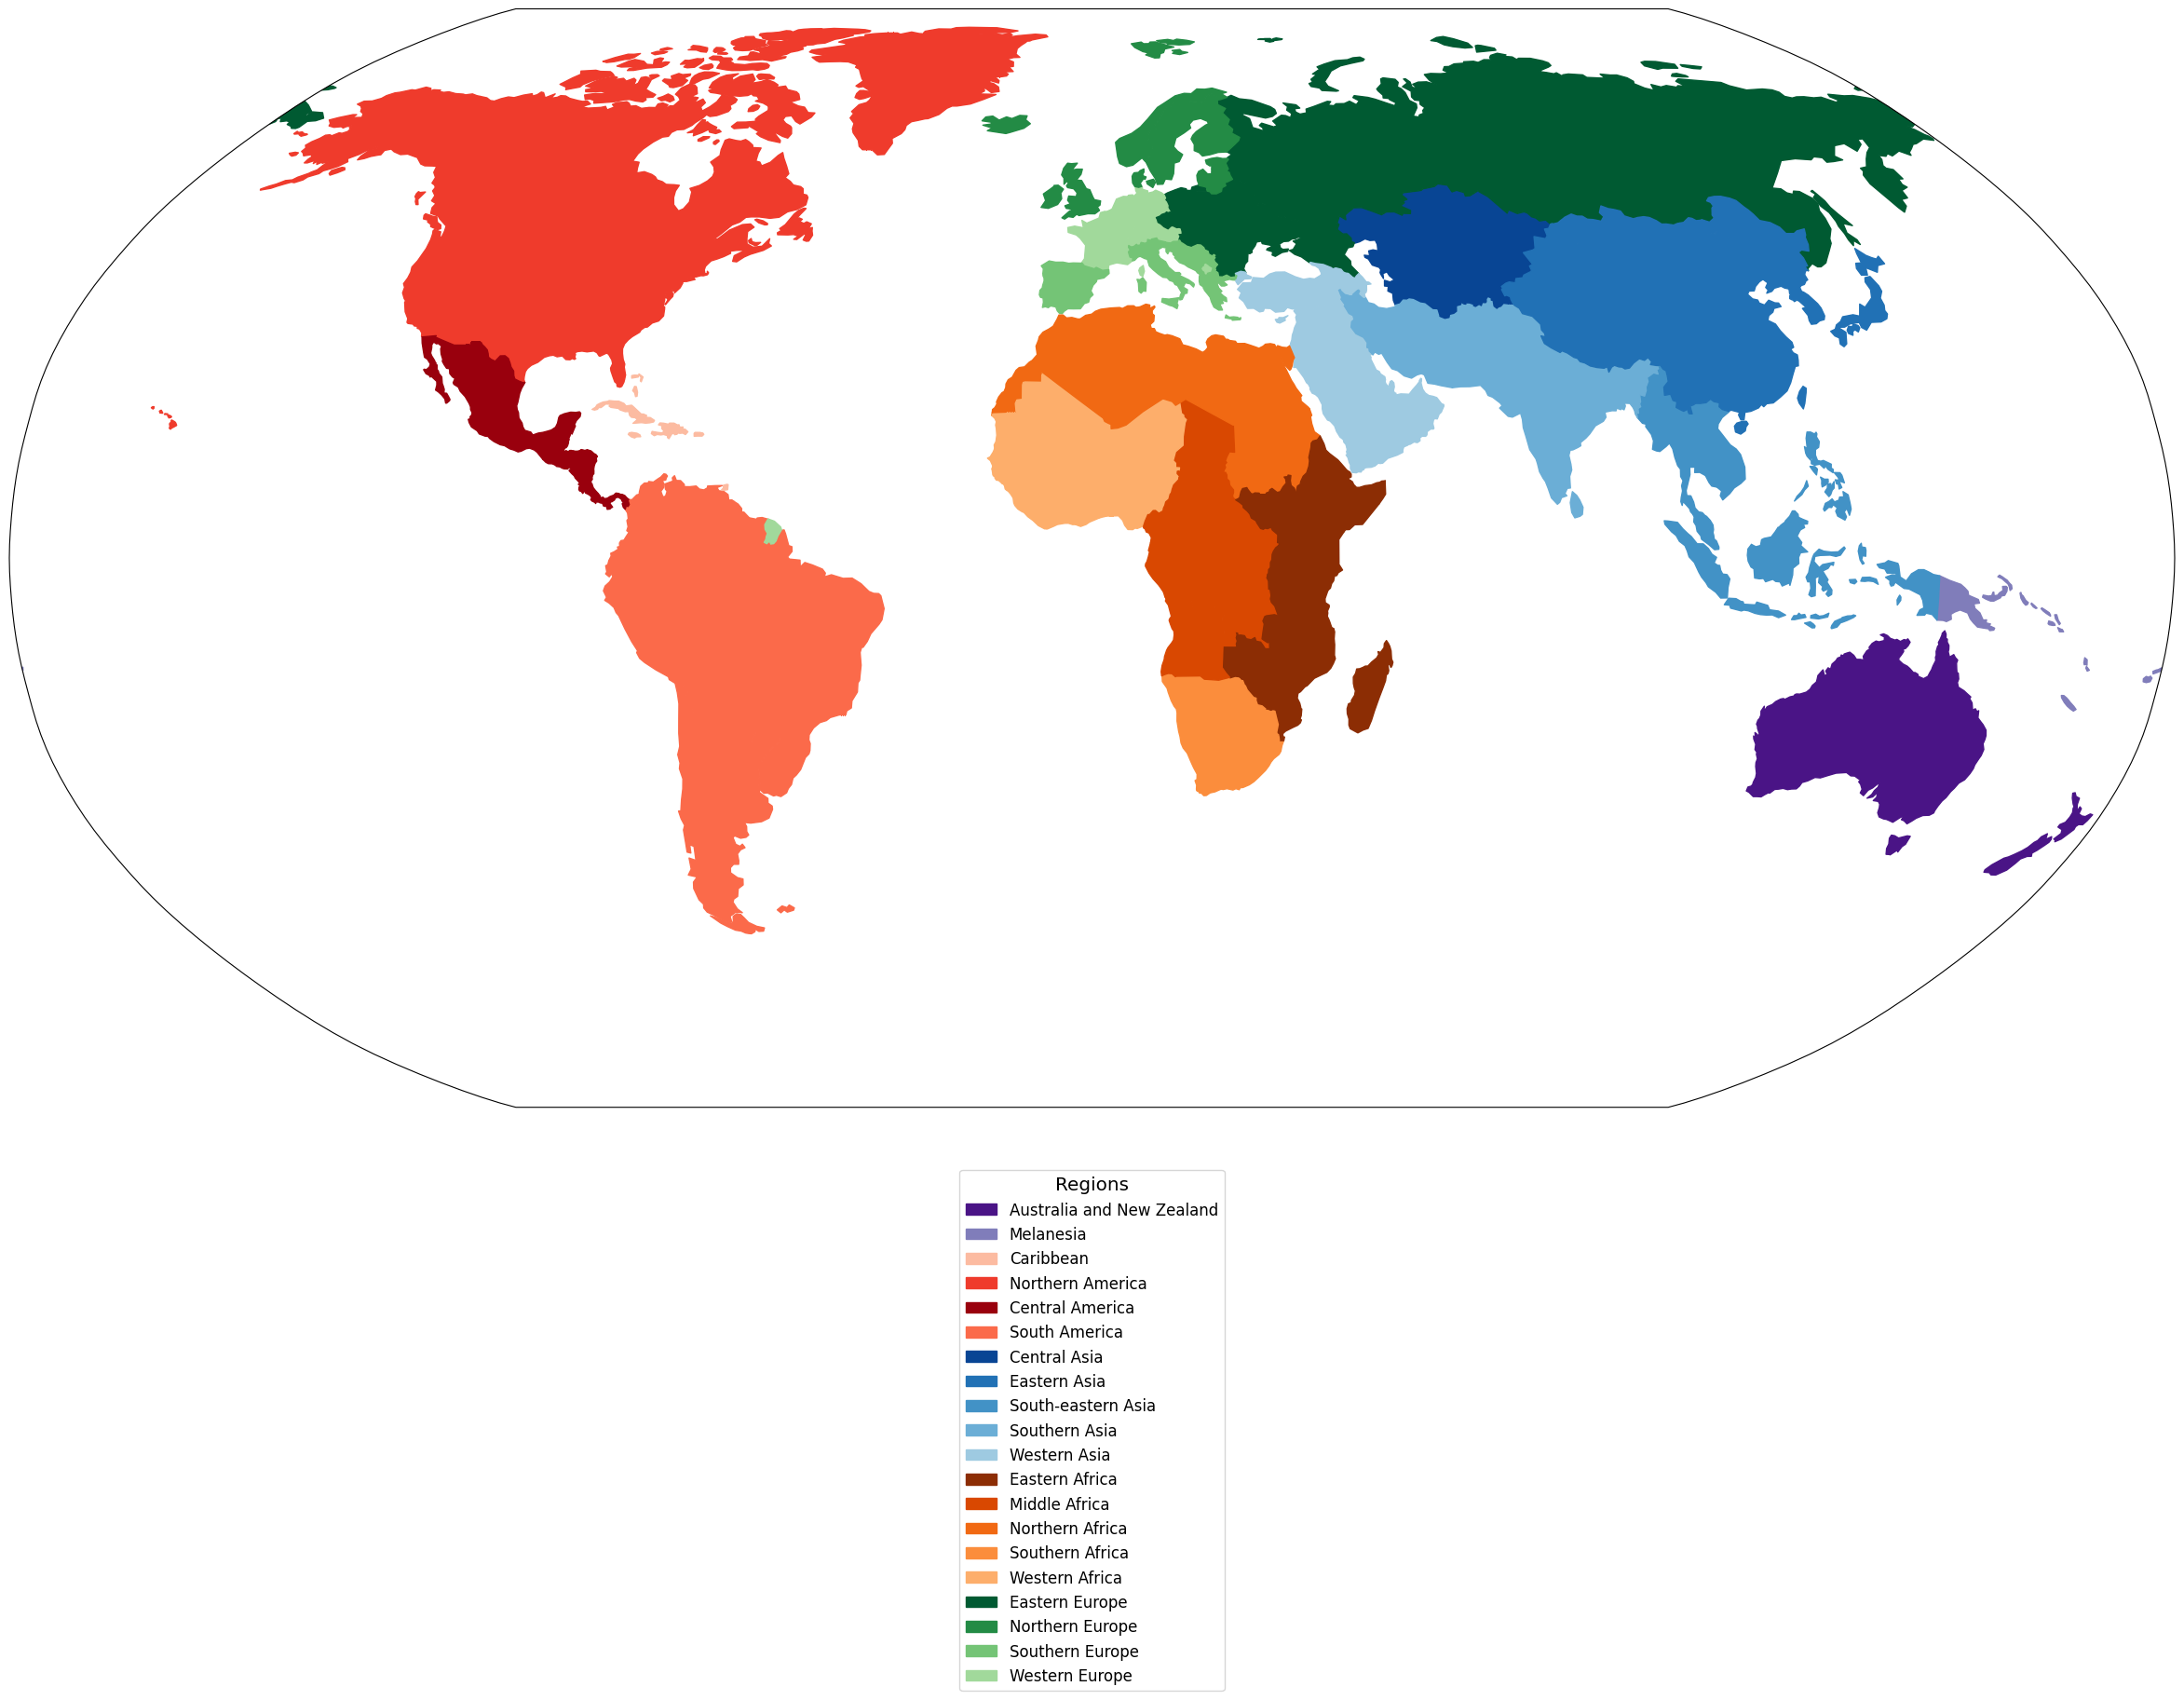

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches

def plot_countries(df, projection, colors):
    plt.figure(figsize=(30, 30))
    ax = plt.axes(projection=projection)
    ax.add_feature(cfeature.OCEAN, facecolor='white')

    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    values = list(df['Region'].unique())

    for country in countries:
        country_name = country.attributes['NAME']
        if country_name in df['Country'].values:
            region = df[df['Country'] == country_name]['Region'].values[0]
            color = colors.get(region, 'gray')  # colors辞書から取得、デフォルトは'gray'
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor=color, linewidth=1)
            
    legend_handles = [
            mpatches.Patch(color=color, label=region) for region, color in colors.items()
    ]
    #ax.legend(handles=legend_handles, loc='lower left', title="Regions", fontsize='large', title_fontsize='x-large')
    plt.legend(
    handles=legend_handles, 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.05),  # 図の下部に配置
    ncol=1,  # 列数（見やすさのため調整）
    fontsize='large', 
    title="Regions", 
    title_fontsize='x-large'
    )

    plt.show()

# データフレームの作成
data = []
for region, countries in modified_dct.items():
    for country in countries:
        data.append({'Country': country, 'Region': region})
df = pd.DataFrame(data)

# 配色設定
colors = {'Australia and New Zealand': '#4a1486', 
    'Melanesia': '#807dba', 
    'Caribbean': '#fcbba1', 
    'Northern America': '#ef3b2c', 
    'Central America': '#99000d', 
    'South America': '#fb6a4a', 
    'Central Asia': '#084594', 
    'Eastern Asia': '#2171b5', 
    'South-eastern Asia': '#4292c6', 
    'Southern Asia': '#6baed6', 
    'Western Asia': '#9ecae1', 
    'Eastern Africa': '#8c2d04', 
    'Middle Africa': '#d94801', 
    'Northern Africa': '#f16913', 
    'Southern Africa': '#fb8d3c', 
    'Western Africa': '#fdae6b', 
    'Eastern Europe': '#005a32', 
    'Northern Europe': '#238b45', 
    'Southern Europe': '#74c476', 
    'Western Europe': '#a1d99b',
}

# 投影法を設定
projection = ccrs.Robinson()

# 地図のプロット
plot_countries(df, projection, colors)

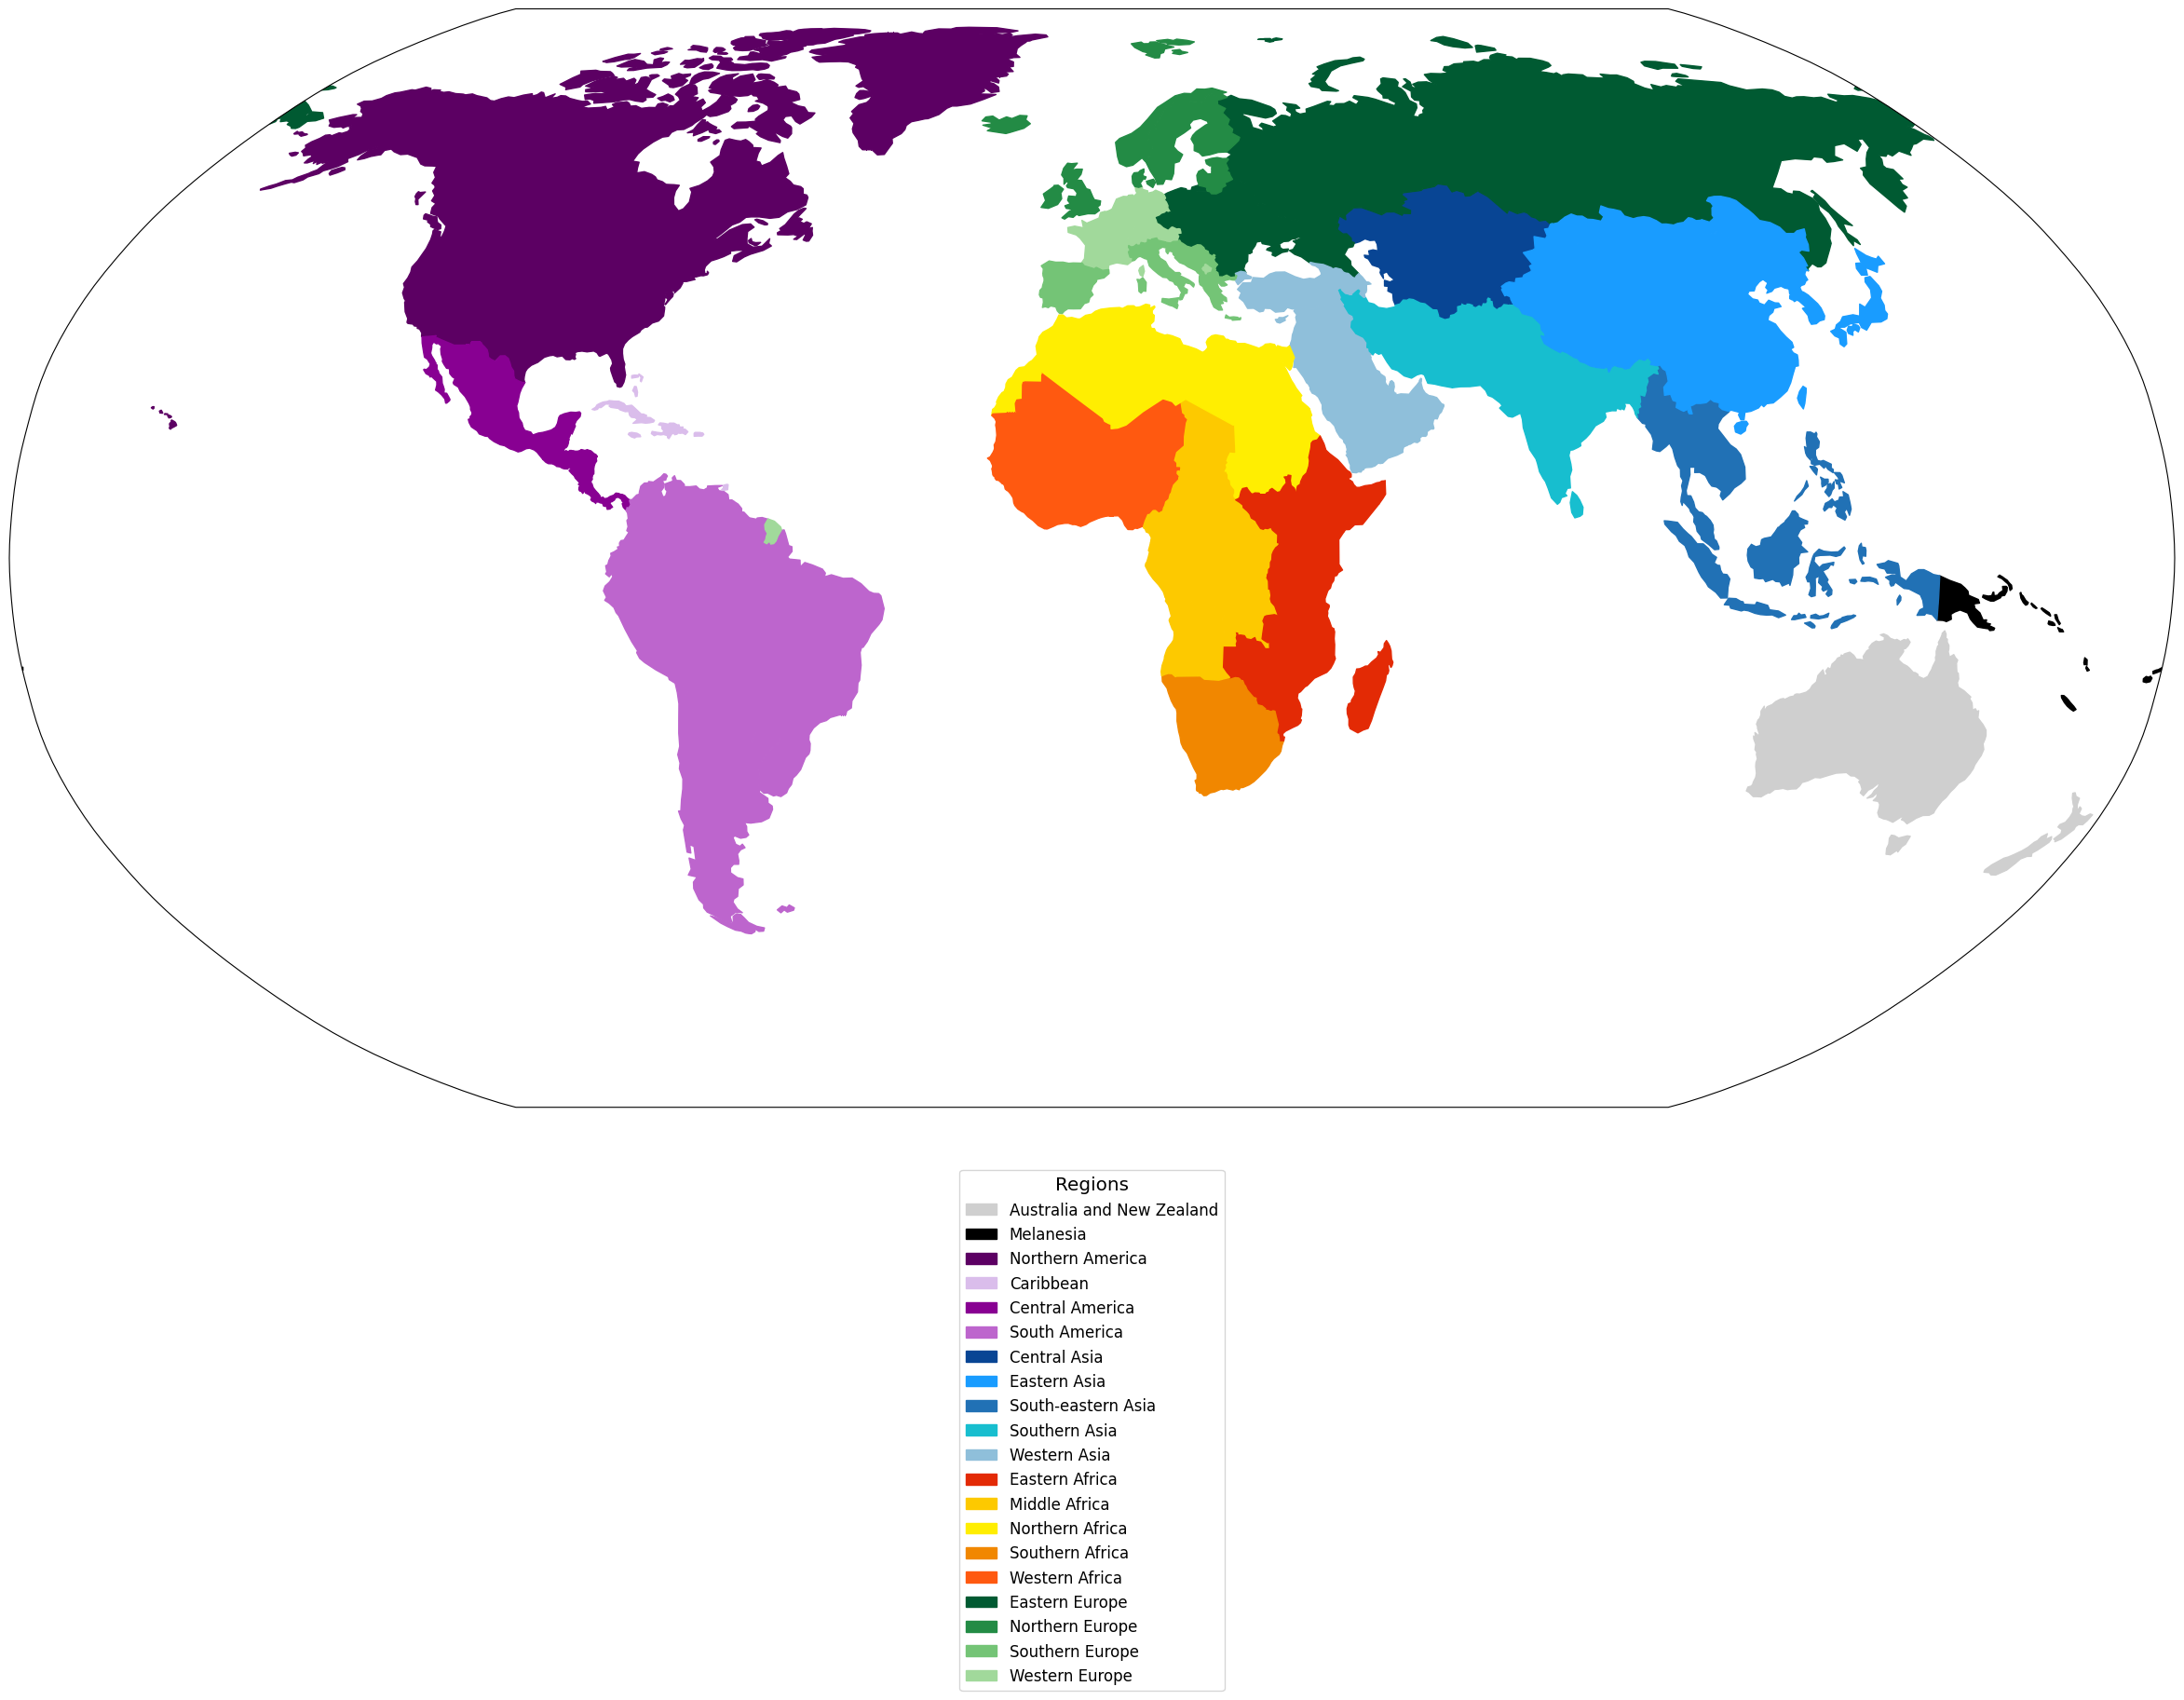

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches

def plot_countries(df, projection, colors):
    plt.figure(figsize=(30, 30))
    ax = plt.axes(projection=projection)
    ax.add_feature(cfeature.OCEAN, facecolor='white')

    shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    values = list(df['Region'].unique())

    for country in countries:
        country_name = country.attributes['NAME']
        if country_name in df['Country'].values:
            region = df[df['Country'] == country_name]['Region'].values[0]
            color = colors.get(region, 'gray')  # colors辞書から取得、デフォルトは'gray'
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor=color, linewidth=1)
            
    legend_handles = [
            mpatches.Patch(color=color, label=region) for region, color in colors.items()
    ]
    #ax.legend(handles=legend_handles, loc='lower left', title="Regions", fontsize='large', title_fontsize='x-large')
    plt.legend(
    handles=legend_handles, 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.05),  # 図の下部に配置
    ncol=1,  # 列数（見やすさのため調整）
    fontsize='large', 
    title="Regions", 
    title_fontsize='x-large'
    )

    plt.show()

# データフレームの作成
data = []
for region, countries in modified_dct.items():
    for country in countries:
        data.append({'Country': country, 'Region': region})
df = pd.DataFrame(data)

# 配色設定
colors = {
    'Australia and New Zealand': '#cfcfcf', 
    'Melanesia': '#000000', 
    'Northern America': '#5c0063', 
    'Caribbean': '#dabdeb', 
    'Central America': '#880092', 
    'South America': '#bd65cd', 
    'Central Asia': '#084594', 
    'Eastern Asia': '#199cff', 
    'South-eastern Asia': '#2171b5', 
    'Southern Asia': '#17becf', 
    'Western Asia': '#8fbfda', 
    'Eastern Africa': '#e32a05', 
    'Middle Africa': '#fdc900', 
    'Northern Africa': '#ffee01', 
    'Southern Africa': '#f18700', 
    'Western Africa': '#ff5910', 
    'Eastern Europe': '#005a32', 
    'Northern Europe': '#238b45', 
    'Southern Europe': '#74c476', 
    'Western Europe': '#a1d99b',
}

# 投影法を設定
projection = ccrs.Robinson()

# 地図のプロット
plot_countries(df, projection, colors)